# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
pricing = pd.read_csv(r"D:\LPU Academic Files\SEM 6 FILES\ML (CSM 354)\Car Price Prediction SLR Project\CarPrice_Assignment.csv")
pricing.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
pricing.shape

(205, 26)

In [4]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
pricing.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
pricing["CarName"] = pricing["CarName"].str.split().str[0].str.lower()

In [7]:
print(pricing["CarName"].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [8]:
pricing=pricing.drop("car_ID",axis =1)

# Creating Duplicate Variables
fueltype ,aspiration, doornumber, enginelocation all of them to binary
carbody, drivewheel, enginetype, fuelsystem, cylindernumber to dummy variable

In [9]:
binary_varlist = ["cylindernumber"]
binary_var_mapping = {
    "cylindernumber":{"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}
}

pricing[binary_varlist] = pricing[binary_varlist].apply(lambda x: x.map(binary_var_mapping.get(x.name, {})))
pricing[binary_varlist]

,cylindernumber
0,4
1,4
2,6
3,4
4,5
...,...
200,4
201,4
202,6
203,6


In [10]:
pricing.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
status = pd.get_dummies(pricing["drivewheel"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [12]:
status = pd.get_dummies(pricing["fueltype"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [13]:
status = pd.get_dummies(pricing["aspiration"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [14]:
status = pd.get_dummies(pricing["doornumber"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [15]:
status = pd.get_dummies(pricing["enginelocation"],drop_first = True)
pricing = pd.concat([pricing,status],axis = 1)

In [16]:
status1 = pd.get_dummies(pricing["carbody"],drop_first = True)
pricing = pd.concat([pricing,status1],axis = 1)

status1 = pd.get_dummies(pricing["fuelsystem"],drop_first = True)
pricing = pd.concat([pricing,status1],axis = 1)

status1 = pd.get_dummies(pricing["CarName"],drop_first = True)
pricing = pd.concat([pricing,status1],axis = 1)

status1 = pd.get_dummies(pricing["enginetype"],drop_first = True)
pricing = pd.concat([pricing,status1],axis = 1)

In [17]:
pricing = pricing.drop(["CarName","enginelocation","doornumber","aspiration","fueltype","drivewheel","fuelsystem","carbody","enginetype"],axis=1)#"carbody"

In [18]:
pricing.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,vokswagen,volkswagen,volvo,vw,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,0,0,0,0,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,0,0,0,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,0,0,1,0,0,0


# Splitting into training and testing data

In [19]:
pricing_train,pricing_test = train_test_split(pricing, train_size = 0.7, random_state = 100)
print(pricing_train.shape)
print(pricing_test.shape)

(143, 65)
(62, 65)


# Scaling of the data

In [20]:
scaler = MinMaxScaler()
num_variables = ["symboling", "wheelbase","carlength", "carwidth","carheight","curbweight",
                 "cylindernumber","enginesize","boreratio","stroke","compressionratio",
                 "horsepower","peakrpm","citympg","highwaympg","price"]
pricing_train[num_variables] = scaler.fit_transform(pricing_train[num_variables])

# Training the model

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [22]:
y_train = pricing_train.pop("price")
x_train = pricing_train

In [23]:
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=18)
rfe = rfe.fit(x_train, y_train)

In [24]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 35),
 ('wheelbase', True, 1),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 15),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', False, 10),
 ('peakrpm', True, 1),
 ('citympg', False, 3),
 ('highwaympg', False, 32),
 ('fwd', False, 36),
 ('rwd', False, 37),
 ('gas', True, 1),
 ('turbo', False, 12),
 ('two', False, 38),
 ('rear', True, 1),
 ('hardtop', False, 7),
 ('hatchback', False, 4),
 ('sedan', False, 6),
 ('wagon', False, 5),
 ('2bbl', False, 33),
 ('4bbl', False, 14),
 ('idi', True, 1),
 ('mfi', False, 44),
 ('mpfi', False, 41),
 ('spdi', False, 40),
 ('spfi', False, 43),
 ('audi', False, 24),
 ('bmw', True, 1),
 ('buick', False, 34),
 ('chevrolet', False, 19),
 ('dodge', False, 16),
 ('honda', False, 20),
 ('isuzu', False, 27),
 ('jaguar', False, 21),
 ('maxda', False, 28),
 ('mazda', False, 31),
 ('mercur

In [25]:
col = x_train.columns[rfe.support_]

In [26]:
col

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'gas', 'rear', 'idi', 'bmw', 'peugeot', 'porsche', 'l', 'rotor'],
      dtype='object')

In [27]:
x_train.columns[~rfe.support_]

Index(['symboling', 'carheight', 'horsepower', 'citympg', 'highwaympg', 'fwd',
       'rwd', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan', 'wagon', '2bbl',
       '4bbl', 'mfi', 'mpfi', 'spdi', 'spfi', 'audi', 'buick', 'chevrolet',
       'dodge', 'honda', 'isuzu', 'jaguar', 'maxda', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'toyouta', 'vokswagen', 'volkswagen', 'volvo', 'vw',
       'dohcv', 'ohc', 'ohcf', 'ohcv'],
      dtype='object')

# Building a model using stats model 

In [28]:
x_train_rfe = x_train[col]
x_train_lm = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train, x_train_lm).fit()

In [31]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           3.89e-67
Time:                        18:02:39   Log-Likelihood:                 216.46
No. Observations:                 143   AIC:                            -396.9
Df Residuals:                     125   BIC:                            -343.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1363      0.074  

In [32]:
vif = pd.DataFrame()
temp = x_train_rfe
vif["Features"] = temp.columns
vif["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

,Features,VIF
10,gas,168.26
12,idi,121.02
8,compressionratio,62.84
5,enginesize,39.35
4,cylindernumber,20.30
3,curbweight,18.24
1,carlength,11.05
14,peugeot,10.22
16,l,9.32
2,carwidth,8.20


# Residual Analysis

In [33]:
y_train_pred = lm.predict(x_train_lm)
y_train_pred

122    0.084823
125    0.516636
166    0.110339
1      0.222704
199    0.318728
         ...   
87     0.158843
103    0.375611
67     0.606867
24     0.041212
8      0.461902
Length: 143, dtype: float64

In [34]:
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         143 non-null    float64
 1   carlength         143 non-null    float64
 2   carwidth          143 non-null    float64
 3   curbweight        143 non-null    float64
 4   cylindernumber    143 non-null    float64
 5   enginesize        143 non-null    float64
 6   boreratio         143 non-null    float64
 7   stroke            143 non-null    float64
 8   compressionratio  143 non-null    float64
 9   peakrpm           143 non-null    float64
 10  gas               143 non-null    uint8  
 11  rear              143 non-null    uint8  
 12  idi               143 non-null    uint8  
 13  bmw               143 non-null    uint8  
 14  peugeot           143 non-null    uint8  
 15  porsche           143 non-null    uint8  
 16  l                 143 non-null    uint8  
 1

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

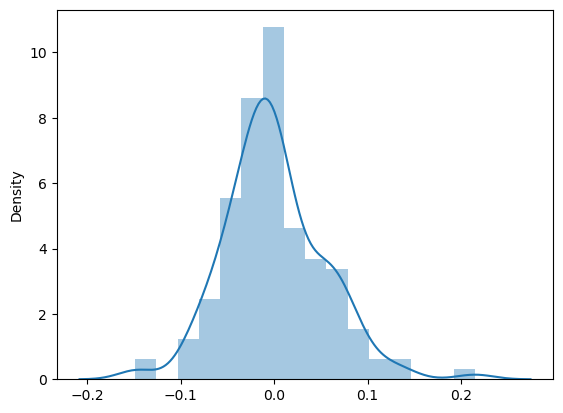

In [35]:
res =y_train - y_train_pred
sns.distplot(res)

# Predictions and Evaluations

In [36]:
num_variables = ["symboling", "wheelbase","carlength", "carwidth","carheight","curbweight",
                 "cylindernumber","enginesize","boreratio","stroke","compressionratio",
                 "horsepower","peakrpm","citympg","highwaympg","price"]
pricing_test[num_variables] = scaler.transform(pricing_test[num_variables])
pricing_test.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,vokswagen,volkswagen,volvo,vw,dohcv,l,ohc,ohcf,ohcv,rotor
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.0,62.0,62.000000,62.000000,62.000000,62.000000,62.0
mean,0.583871,0.437764,0.559481,0.480376,0.559663,0.428470,0.232258,0.265673,0.556580,0.544314,...,0.016129,0.064516,0.080645,0.0,0.0,0.048387,0.806452,0.048387,0.064516,0.0
std,0.271724,0.212861,0.189947,0.165440,0.215811,0.179488,0.088288,0.162820,0.228484,0.160738,...,0.127000,0.247676,0.274512,0.0,0.0,0.216335,0.398304,0.216335,0.247676,0.0
min,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.200000,0.067925,-0.111111,-0.060606,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.313793,0.459350,0.358333,0.384956,0.305275,0.200000,0.177358,0.404762,0.484848,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0
50%,0.600000,0.387931,0.547967,0.441667,0.588496,0.406129,0.200000,0.226415,0.563492,0.585859,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0
75%,0.800000,0.570690,0.719919,0.516667,0.699115,0.564876,0.200000,0.316038,0.746032,0.641414,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.0
max,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.600000,0.932075,0.888889,0.863636,...,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


In [37]:
y_test = pricing_test.pop("price")
x_test = pricing_test

In [38]:
x_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,...,vokswagen,volkswagen,volvo,vw,dohcv,l,ohc,ohcf,ohcv,rotor
160,0.4,0.313793,0.409756,0.341667,0.460177,0.235066,0.2,0.139623,0.404762,0.424242,...,0,0,0,0,0,0,1,0,0,0
186,0.8,0.368966,0.497561,0.433333,0.699115,0.305275,0.2,0.181132,0.404762,0.611111,...,0,1,0,0,0,0,1,0,0,0
59,0.6,0.420690,0.596748,0.516667,0.522124,0.347944,0.2,0.230189,0.563492,0.606061,...,0,0,0,0,0,0,1,0,0,0
165,0.6,0.272414,0.448780,0.308333,0.424779,0.301396,0.2,0.139623,0.444444,0.449495,...,0,0,0,0,0,0,0,0,0,0
140,0.8,0.231034,0.263415,0.291667,0.699115,0.291699,0.2,0.177358,0.746032,0.227273,...,0,0,0,0,0,0,0,1,0,0


In [39]:

x_test_rfe = x_test[x_train_rfe.columns]
x_test_rfe = sm.add_constant(x_test_rfe)
x_test_rfe.head()

,const,wheelbase,carlength,carwidth,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,peakrpm,gas,rear,idi,bmw,peugeot,porsche,l,rotor
160,1.0,0.313793,0.409756,0.341667,0.235066,0.2,0.139623,0.404762,0.424242,0.12500,0.265306,1,0,0,0,0,0,0,0
186,1.0,0.368966,0.497561,0.433333,0.305275,0.2,0.181132,0.404762,0.611111,0.12500,0.448980,1,0,0,0,0,0,0,0
59,1.0,0.420690,0.596748,0.516667,0.347944,0.2,0.230189,0.563492,0.606061,0.10000,0.265306,1,0,0,0,0,0,0,0
165,1.0,0.272414,0.448780,0.308333,0.301396,0.2,0.139623,0.444444,0.449495,0.15000,1.000000,1,0,0,0,0,0,0,0
140,1.0,0.231034,0.263415,0.291667,0.291699,0.2,0.177358,0.746032,0.227273,0.10625,0.102041,1,0,0,0,0,0,0,0


In [40]:
y_test_pred = lm.predict(x_test_rfe)

In [41]:
r2_score(y_true = y_test, y_pred = y_test_pred)

0.8917761758887846

Text(0, 0.5, 'y_pred')

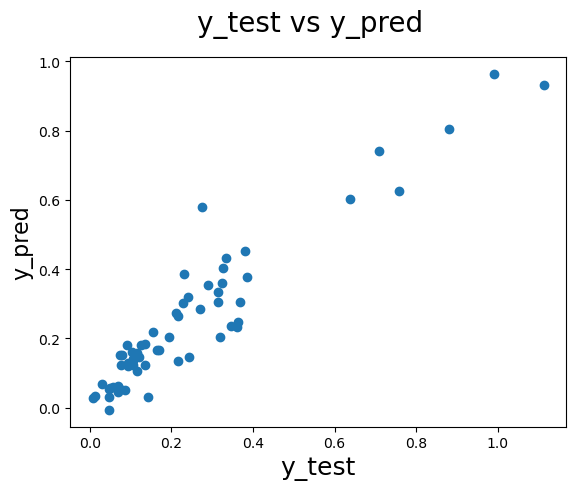

In [42]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label